# 计算物理第一次作业


In [123]:
#!/usr/bin/env python

# 利用递推关系就可以，不需要使用对数

# 阶乘
def fac(i):
    if i==0:
        return 1
    else:
        return i*(fac(i-1))

tmp = 1
for i in range(0,11):
    print("Dimension:"+str(i),"det(H)="+str(tmp))
    tmp = (fac(i)**4) /(fac(2*i + 1)* fac(2*i))* tmp
    

Dimension:0 det(H)=1
Dimension:1 det(H)=1.0
Dimension:2 det(H)=0.08333333333333333
Dimension:3 det(H)=0.000462962962962963
Dimension:4 det(H)=1.6534391534391535e-07
Dimension:5 det(H)=3.749295132515087e-12
Dimension:6 det(H)=5.367299887358688e-18
Dimension:7 det(H)=4.835802623926117e-25
Dimension:8 det(H)=2.7370501137915134e-33
Dimension:9 det(H)=9.720234311925e-43
Dimension:10 det(H)=2.1641792264314924e-53


## 以下是解方程需要用到的函数
    具体功能和注意事项均在注释。此处没有使用任何的为矩阵运算优化的包。
    使用了串行的编程模式来实现矩阵的各种运算，故程序效率不高，但是基本功能可以实现。

In [125]:
def transpose(A):
    # To transpose a matrix.
    # return type: List
    m = len(A); n = len(A[0])
    B = []; tmp = []
    
    for i in range(n):
        for j in range(m):
            tmp.append(A[j][i])
        B.append(tmp)
        tmp = []
    return B

def findMax(a,startingIdx):
    # 用于列支点遴选，用于找到列最大元以及其下标, max_{startingIdx<=r<=n} a_{ri}
    # arg type : a - list,  startingIdx - int
    # return type:   maxidx - int, maxnum - float(same as data in a)
    n = len(a)
    maxnum = -1
    maxidx = -1
    for i in range(startingIdx,n):
        if a[i]>maxnum:
            maxnum=a[i]
            maxidx=i;
    return maxidx,maxnum

def swap(vector,i,j):
    # 交换两个向量的值
    tmp = vector[i]
    vector[i] = vector[j]
    vector[j] = tmp

def shape(A):
    # 得到一个矩阵的尺寸
    m = len(A)
    n = len(A[0])
    return m,n

def mdot(A,B):
    # 矩阵乘法,如果不符合矩阵要求则报错
    # 注意： 若输入矩阵为一维，则需要将每一维的元素从int转为list才能正常进行运算
    Am, An = shape(A)
    Bm, Bn = shape(B)
    C = []
    if(An!=Bm):
        print("Wrong dimension.\n")
        return
    else:
        for i in range(Am):
            tmplist = []
            for j in range(Bn):
                tmp = 0
                for k in range(An):
                    tmp += A[i][k]*B[k][j]
                tmplist.append(tmp)
            C.append(tmplist)
        return C

def multiply(scale,array):
    # 矢量数乘
    n =len(array)
    ans = []
    for i in range(n):
        ans.append(array[i] * scale)
    return ans

def add(va,vb):
    # 向量加法，element-wise add
    n =len(va)
    ans = []
    for i in range(n):
        ans.append(va[i] + vb[i])
    return ans

def solveL(L,b):
    # 解下三角线性方程组，要求L为下三角方阵，Lx=b，返回x
    # return type: list
    n = len(L)
    for i in range(n-1):
        b[i] /= L[i][i]
        for j in range(i+1,n):
            b[j] -= b[i]*L[j][i]
    b[n-1] /= L[n-1][n-1]
    return b
    
def solveU(U,b):
    # 回代法求解上三角线性方程组，要求U为上三角方阵，Ux=b，返回x
    # return type: list
    n = len(U)
    i = n-1
    while i >= 0:
        b[i] /= U[i][i]
        for j in range(i):
            b[j] -= U[j][i]*b[i]
        i -= 1 结果
    b[0] /= U[0][0]
    return b
    
def GEM(_A,_b):
    # 带部分指点遴选的高斯消元法解Ax=b
    # return type: x - list
    A = _A; b = _b;
    n = len(b)
    x = b
    j = 0
    for i in range(n):
        idx, pivot = findMax(transpose(A)[i],i)
        if idx!=i:
            swap(A,i,idx)
            swap(b,i,idx)
        for j in range(i+1,n):
            ratio = A[j][i]/pivot
            A[j] = add(A[j] , multiply(- A[j][i]/pivot , A[i]))
            b[j] = b[j] - (ratio)*b[i]
    return solveU(A,b)

def Cholesky(_A,_b):
    # Cholesky 分解杰Ax=b
    # return type: x - list
    A = _A; b = _b
    n= len(A)
    x = b
    j = 0
    for i in range(n):
        A[i][i] = A[i][i] ** 0.5
        for j in range(i+1,n):
            A[j][i] /= A[i][i]
        for j in range(i+1,n):
            A[i][j] = 0.
            for l in range(j,n):
                    A[l][j] = A[l][j] - A[l][i] * A[j][i]
    L = A
    return solveU(transpose(L),solveL(L,b))

def constructH(dim):
    # 构造Hilbert matrix 和b= [1,1,...,1]
    # return type: H - hilbert matrix, list
    #              b - [1,1,...,1], list
    H = []
    b = []
    for i in range(dim):
        tmp = []
        for j in range(dim):
            tmp.append(1/float(i+j+1))
        H.append(tmp)
        b.append(1)
    return H,b

[1.0]
[1.0]
[-2.000000000000001, 6.000000000000002]
[-2.0000000000000004, 6.000000000000001]
[3.0000000000000195, -24.000000000000092, 30.00000000000008]
[3.000000000000007, -24.00000000000003, 30.00000000000002]
[-3.9999999999993037, 59.99999999999213, -179.999999999981, 139.9999999999876]
[-3.999999999999037, 59.999999999988894, -179.99999999997303, 139.99999999998238]
[4.999999999999979, -120.00000000002957, 630.0000000002034, -1120.0000000003838, 630.0000000002148]
[4.9999999999889155, -119.99999999982066, 629.9999999993023, -1119.999999999025, 629.9999999995512]
[-6.00000000112054, 210.00000003295153, -1680.000000226701, 5040.000000596099, -6300.000000662999, 2772.0000002627203]
[-6.000000000975177, 210.0000000290558, -1680.0000002016359, 5040.000000533447, -6300.000000596026, 2772.0000002370175]
[7.000000043006224, -336.00000171066466, 3780.000016427837, -16800.000063686013, 34650.00011646994, -33264.0001004294, 12012.000032914895]
[7.000000042964672, -336.00000171475523, 3780.00

/home/yipzlf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/yipzlf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


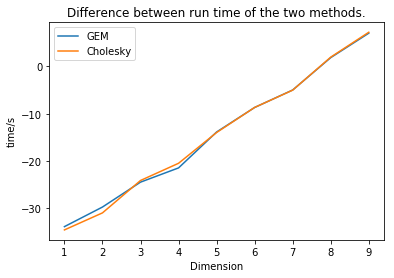

In [172]:
# n 为维数，可以改变n的赋值语句来考察不同维数下得到的解
# ans_gem 为用高斯消元法得到的结果
# ans_cho 为用Cholesky分解得到的结果
# n = 14时结果开始失效
mma_ans = {}
mma_ans[1] = np.array([1])
mma_ans[2] = np.array([-2,6])
mma_ans[3] = np.array([3, -24, 30])
mma_ans[4] = np.array([-4, 60, -180, 140])
mma_ans[5] = np.array([5, -120, 630, -1120, 630])
mma_ans[6] = np.array([-6, 210, -1680, 5040, -6300, 2772])
mma_ans[7] = np.array([7, -336, 3780, -16800, 34650, -33264, 12012])
mma_ans[8] = np.array([-8, 504, -7560, 46200, -138600, 216216, -168168, 51480])
mma_ans[9] = np.array([9, -720, 13860, -110880, 450450, -1009008, 1261260, -823680, 218790])
mma_ans[10] = np.array([-10, 990, -23760, 240240, -1261260, 3783780, -6726720, 7001280, -3938220, 923780])


_res = np.zeros((2,10))
for i in range(10):
    n = i+1
    ans_gem = []
    ans_cho = []
    A,b = constructH(n)
    ans_gem = GEM(A,b)
    A,b = constructH(n)
    ans_cho = Cholesky(A,b)
    print(ans_gem)
    print(ans_cho)
    _res[0][i] = np.linalg.norm(ans_gem - mma_ans[n])
    _res[1][i] = np.linalg.norm(ans_cho - mma_ans[n])

plt.plot(range(10),np.log(_res[0]),label='GEM')
plt.plot(range(10),np.log(_res[1]),label='Cholesky')

plt.title('Difference between run time of the two methods.')
plt.xlabel('Dimension')
plt.ylabel('time/s')
plt.legend()
plt.show()

由上已知，两种方法得到的结果是不一样的，而且差别不小。以上是作业的基本要求。

## 拓展讨论
接下来使用python的一些包，来将两种方法在时间效率和准确度上的差别进行可视化。

In [168]:
import numpy as np
import matplotlib.pyplot as plt

NUM = 13


# 以下部分计算了维数由1到100变化，两种方法得到的结果的差的矢量的模长（L2模）
# 存储在res中。
res = np.zeros(NUM)
for i in range(1,NUM):
    n = i
    ans_gem = []
    ans_cho = []
    A,b = constructH(n)
    ans_gem = GEM(A,b)
    A,b = constructH(n)
    ans_cho = Cholesky(A,b)
    res[i-1] = np.linalg.norm(np.array(ans_gem)-np.array(ans_cho))
print(res)


[0.00000000e+00 9.93013661e-16 8.88356038e-14 1.00599584e-11
 1.77267160e-09 9.85633031e-08 1.38876811e-06 2.11098835e-04
 6.76474731e-01 2.44208275e+02 1.64009339e+04 5.48586412e+06
 0.00000000e+00]


In [169]:
# 以下部分计算了维数由1到100变化，两种方法得到的结果运行的时间差（每个维度运行10次取平均值）
# 存储在runtimeGEM和runtimeCho中。

import time
NUM = 13
runtimeGEM = np.zeros(NUM)
runtimeCho = np.zeros(NUM)
for i in range(1,NUM):
    rep = 10
    n = i 
    tmp = 0.
    ans_gem = []
    ans_cho = []
    for j in range(rep):
        A,b = constructH(n)
        start = time.time()
        ans_gem = GEM(A,b)
        end = time.time()
        tmp += (end-start) 
    runtimeGEM[i] = tmp/rep
    
    for j in range(rep):
        A,b = constructH(n)
        start = time.time()
        ans_cho = Cholesky(A,b)
        end = time.time()
        tmp += (end-start) 
    runtimeCho[i] = tmp/rep

print(runtimeGEM,runtimeCho)


[0.00000000e+00 8.98838043e-06 2.19821930e-05 5.07593155e-05
 7.35759735e-05 1.28364563e-04 1.96695328e-04 2.73346901e-04
 3.04126740e-04 3.60536575e-04 4.38642502e-04 8.39829445e-04
 8.02850723e-04] [0.00000000e+00 2.00271606e-05 3.85284424e-05 7.35282898e-05
 1.06191635e-04 1.90067291e-04 2.54797935e-04 3.66044044e-04
 3.93438339e-04 4.57048416e-04 5.53417206e-04 1.01773739e-03
 9.79590416e-04]


/home/yipzlf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


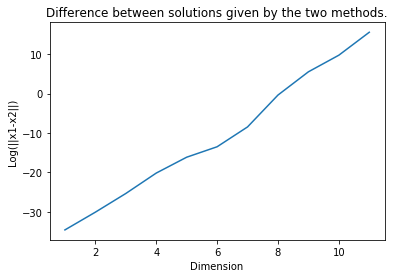

In [170]:
plt.plot(range(NUM), np.log(res))
plt.title('Difference between solutions given by the two methods.')
plt.xlabel('Dimension')
plt.ylabel('Log(||x1-x2||)')

plt.show()

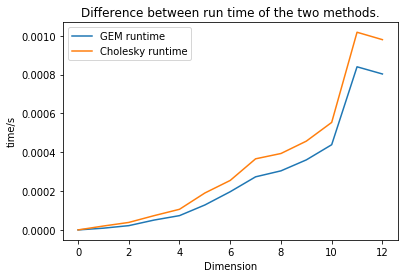

In [171]:
plt.plot(range(NUM),runtimeGEM,label='GEM runtime')
plt.plot(range(NUM),runtimeCho,label='Cholesky runtime')

plt.title('Difference between run time of the two methods.')
plt.xlabel('Dimension')
plt.ylabel('time/s')
plt.legend()
plt.show()